In [ ]:
# Presentation is here - https://prezi.com/view/9e6BMa8cFUg4m7gG2X4q/

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option("display.max_rows", None)
# import warnings
# warnings.filterwarnings("ignore")

In [4]:
df = pd.read_csv("train.csv")

In [5]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [4]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


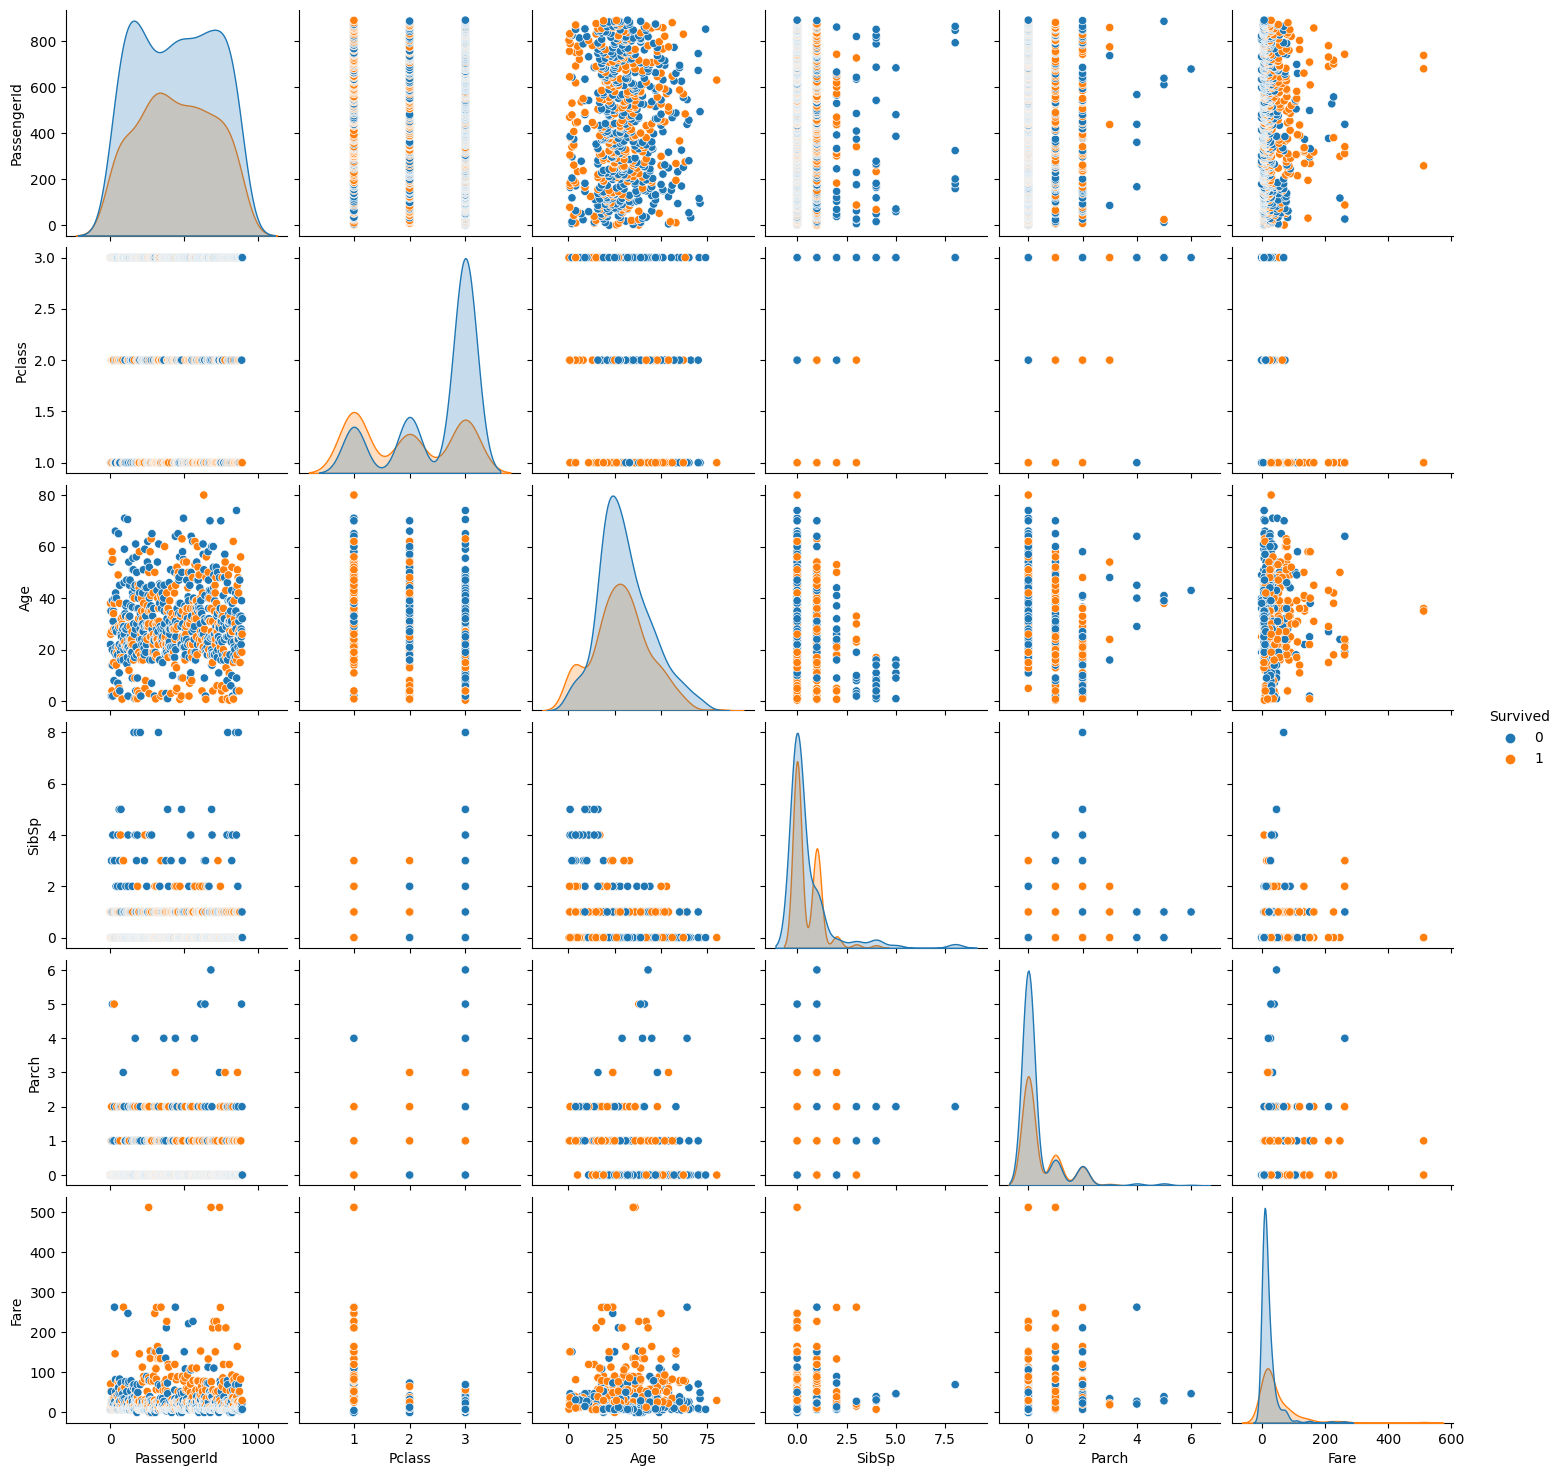

In [5]:
sns.pairplot(data=df,hue='Survived')

<AxesSubplot: >

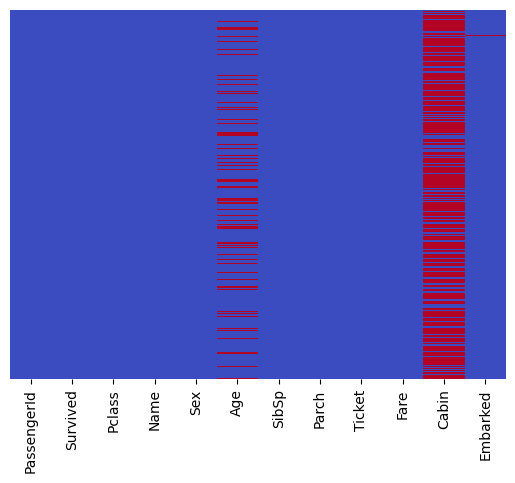

In [9]:
sns.heatmap(df.isna(),yticklabels=False,cbar=False,cmap='coolwarm')

In [7]:
#Handling Embarked feature

df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

29.69911764705882

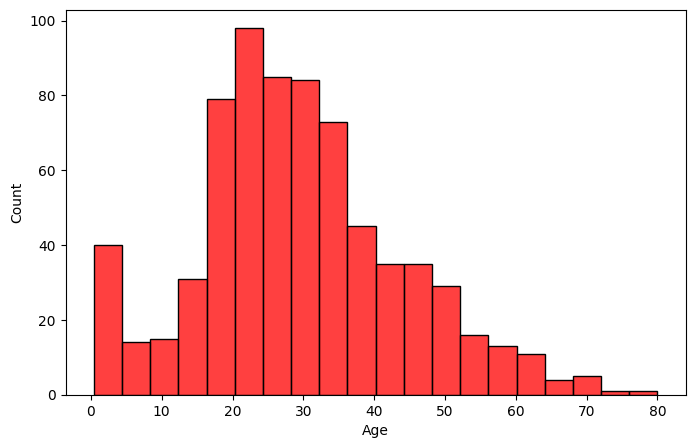

In [7]:
plt.figure(figsize=(8,5))
sns.histplot(df['Age'].dropna(),color='red')
df['Age'].dropna().mean()

In [9]:
#Capturing nan with new feature
df['Age_NaN']=np.where(df['Age'].isnull(),1,0)

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
Age_NaN          0
Age_mean         0
dtype: int64


<AxesSubplot: xlabel='Age_mean', ylabel='Count'>

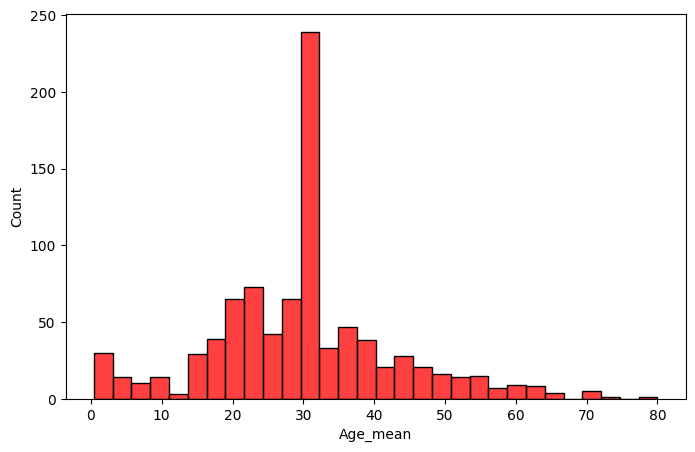

In [10]:
df['Age_mean']=df['Age'].fillna(df.Age.mean())
print(df.isnull().sum())
plt.figure(figsize=(8,5))
sns.histplot(df['Age_mean'],color='red')

In [11]:
from sklearn.linear_model import LinearRegression
lin=LinearRegression()
data_with_null=df[['Survived' ,'Pclass','SibSp','Parch','Fare','Age']]
data_without_null=data_with_null.dropna()
train=data_without_null.iloc[:,:5]
target=data_without_null.iloc[:,5]
lin.fit(train,target)
test=data_with_null.iloc[:,:5]
pridect_Age=pd.DataFrame(lin.predict(test))
data_with_null.Age.fillna(pridect_Age[0] ,inplace=True)

In [12]:
df['pridect_Age']=data_with_null.Age
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_NaN,Age_mean,pridect_Age
0,1,0,3,"Braund, Mr. Owen Harris",male,22.00,1,0,A/5 21171,7.2500,NaN,S,0,22.000000,22.000000
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.00,1,0,PC 17599,71.2833,C85,C,0,38.000000,38.000000
2,3,1,3,"Heikkinen, Miss. Laina",female,26.00,0,0,STON/O2. 3101282,7.9250,NaN,S,0,26.000000,26.000000
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.00,1,0,113803,53.1000,C123,S,0,35.000000,35.000000
4,5,0,3,"Allen, Mr. William Henry",male,35.00,0,0,373450,8.0500,NaN,S,0,35.000000,35.000000
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,1,29.699118,29.103651
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.00,0,0,17463,51.8625,E46,S,0,54.000000,54.000000
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.00,3,1,349909,21.0750,NaN,S,0,2.000000,2.000000
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.00,0,2,347742,11.1333,NaN,S,0,27.000000,27.000000
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.00,1,0,237736,30.0708,NaN,C,0,14.000000,14.000000


<AxesSubplot: xlabel='pridect_Age', ylabel='Count'>

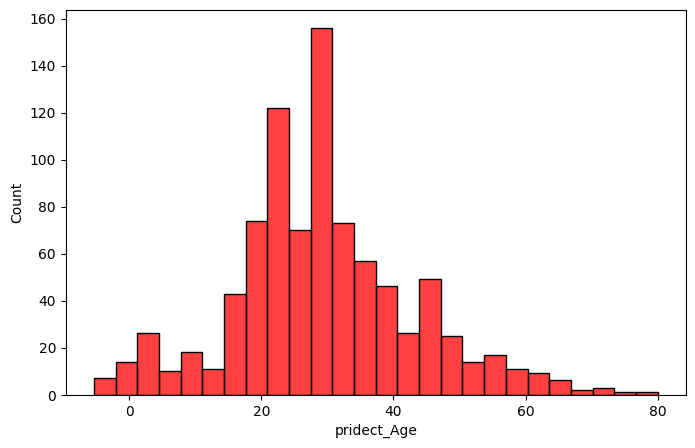

In [13]:
plt.figure(figsize=(8,5))
sns.histplot(df['pridect_Age'],color='red')

In [16]:
df['Cabin_NaN']=np.where(df['Cabin'].isnull(),1,0)

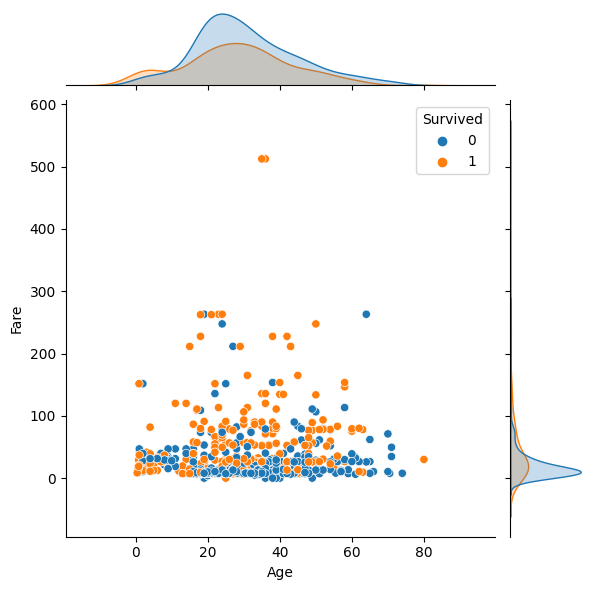

In [17]:
sns.jointplot(data=df,x='Age',y='Fare',hue='Survived')

<AxesSubplot: xlabel='SibSp', ylabel='Count'>

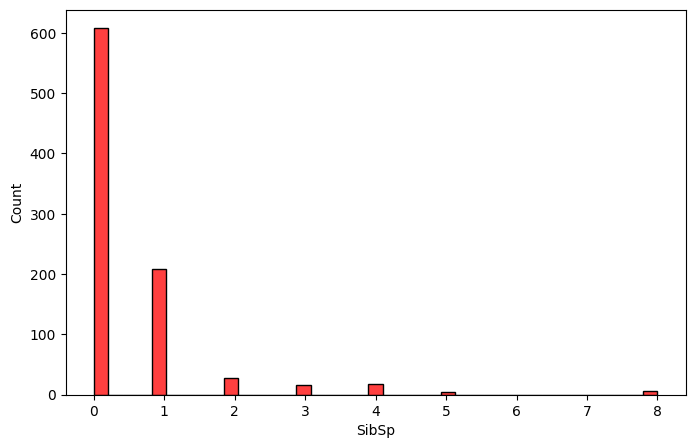

In [18]:
plt.figure(figsize=(8,5))
sns.histplot(df['SibSp'],color='red')

<AxesSubplot: xlabel='Pclass', ylabel='Survived'>

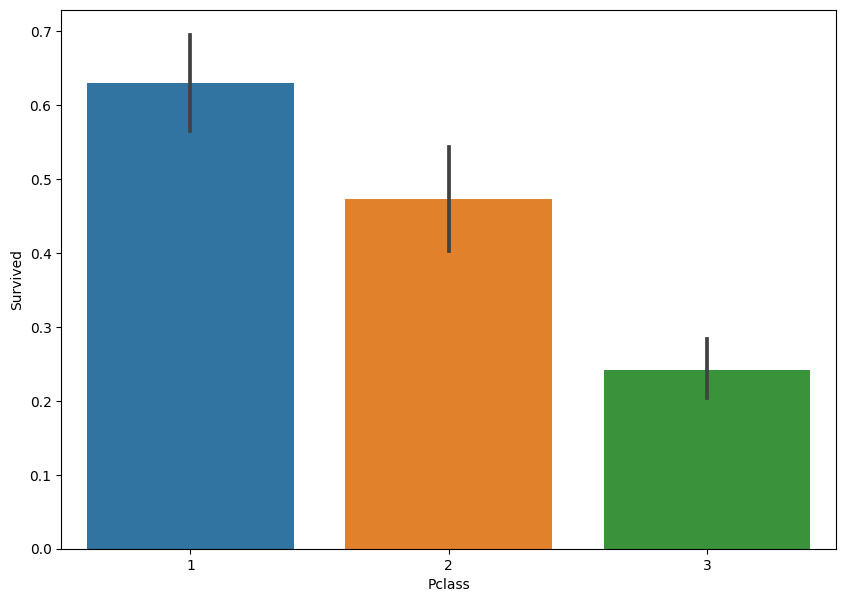

In [19]:
plt.figure(figsize=(10,7))
sns.barplot(data=df,x='Pclass',y='Survived')


<AxesSubplot: xlabel='Parch', ylabel='Count'>

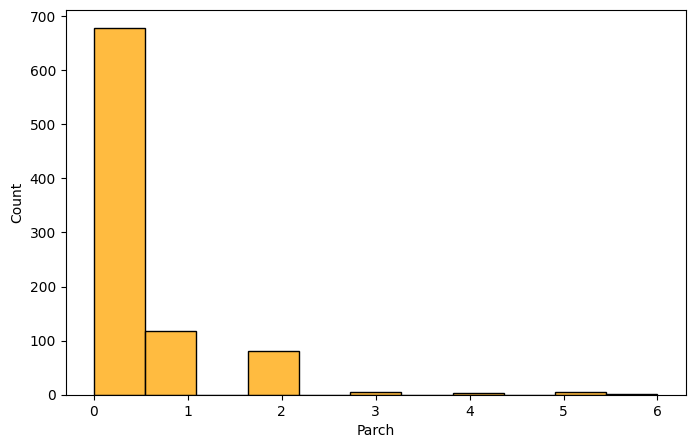

In [20]:
plt.figure(figsize=(8,5))
sns.histplot(df['Parch'],color='orange')

<AxesSubplot: xlabel='Sex', ylabel='Survived'>

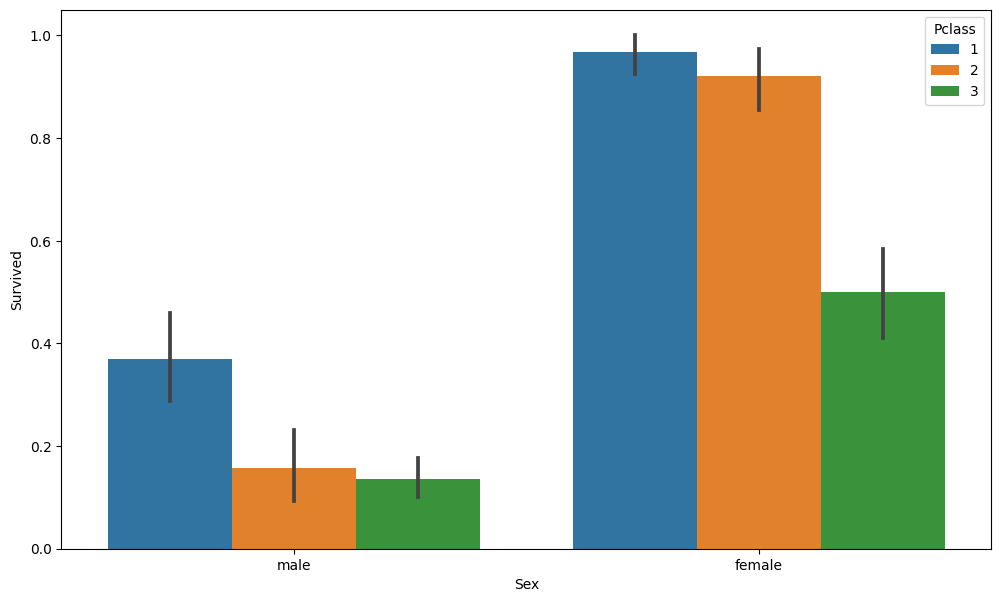

In [21]:

plt.figure(figsize=(12,7))
sns.barplot(data=df,x='Sex',y='Survived',hue='Pclass')

<AxesSubplot: xlabel='Pclass', ylabel='Age'>

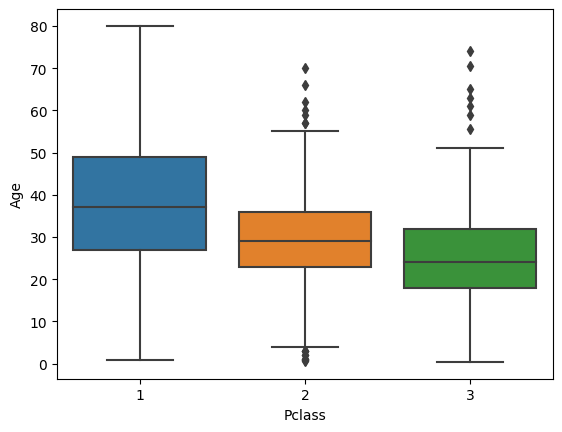

In [22]:
sns.boxplot(data=df,y='Age',x='Pclass')

In [10]:
# How many people Survived? 1 as yes and 0 as no. 
df["Survived"] = df["Survived"].map({1:"yes" , 0 :"no"})
df["Survived"].value_counts()

no     549
yes    342
Name: Survived, dtype: int64

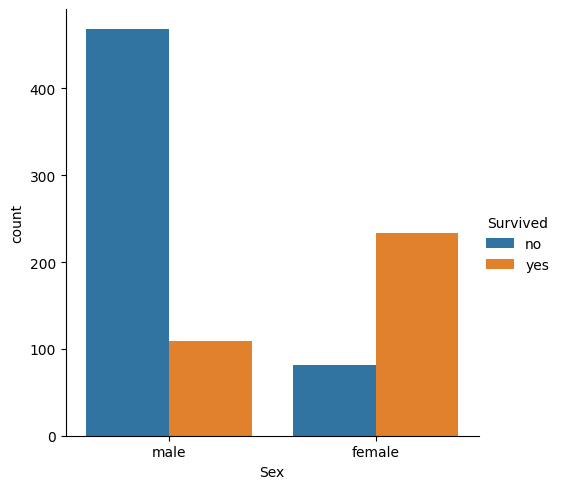

In [12]:
# Survived by sex
sns.catplot(data = df, x ="Sex", hue ="Survived", kind ="count")

<AxesSubplot: xlabel='Pclass', ylabel='count'>

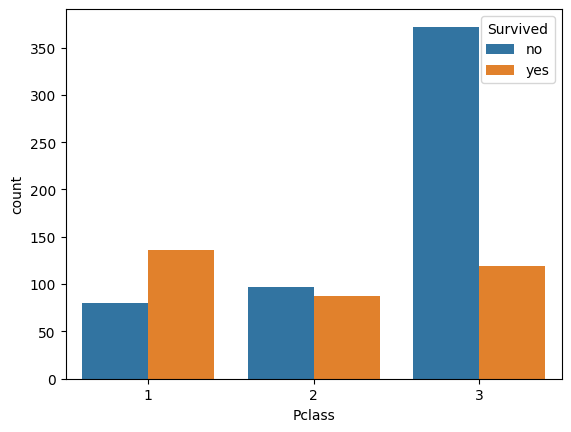

In [21]:
# Survived by Pclass
sns.countplot(x = df["Pclass"], hue = df["Survived"], data = df)

<AxesSubplot: xlabel='SibSp', ylabel='count'>

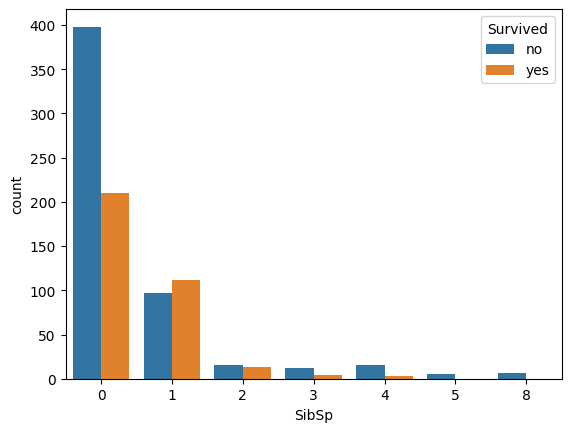

In [24]:
# Siblings, spouses
sns.countplot(x = df["SibSp"], hue = df["Survived"], data = df)

<AxesSubplot: xlabel='Embarked', ylabel='count'>

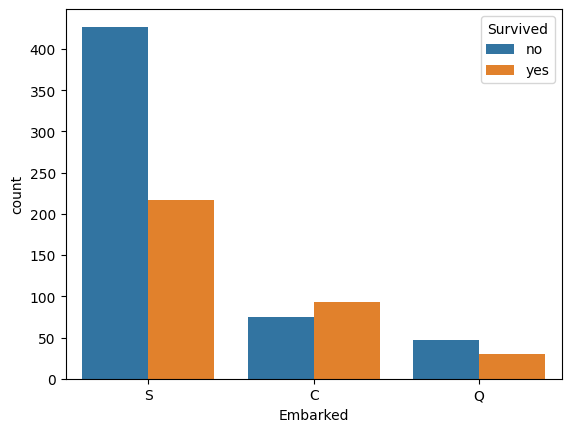

In [40]:
sns.countplot(x = df["Embarked"],hue = df["Survived"],data = df)